Use User Data set and show the accuracy through the SVM model.

In [1]:
##importing the Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
userdata=pd.read_csv("D:/JupyterNotebook/User_Data - Arindam Dev (1).csv")

In [3]:
userdata.head(8)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1


In [4]:
data=userdata.drop('Gender', axis=1)
data.head(8)

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0
5,15728773,27,58000,0
6,15598044,27,84000,0
7,15694829,32,150000,1


In [5]:
x=data.iloc[:,:1]
x.head(3)

,User ID
0,15624510
1,15810944
2,15668575


In [6]:
y=data.iloc[:,3:4]
y.head(3)

,Purchased
0,0
1,0
2,0


In [7]:
##Training and the testing the  dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=6)

In [8]:
print('\n xtrain:',xtrain.shape)
print('\n xtest:',xtest.shape)
print('\n ytrain:',ytrain.shape)
print('\n ytest:',ytest.shape)


 xtrain: (320, 1)

 xtest: (80, 1)

 ytrain: (320, 1)

 ytest: (80, 1)


In [9]:
##Scaling down the features using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [10]:
scaled_xtrain=scaler.fit_transform(xtrain)
scaled_xtest=scaler.fit_transform(xtest)

Importing SVM model

In [11]:
from sklearn.svm import SVC

In [12]:
classifier=SVC(kernel='rbf')
classifier.fit(scaled_xtrain,ytrain)

C:\Users\sudri\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [13]:
ypred=classifier.predict(scaled_xtest)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:

##checking for accuracy, confusion matrix , classification report 

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [15]:
matrix =confusion_matrix(ytest,ypred)
matrix

array([[52,  0],
       [28,  0]], dtype=int64)

Text(87.0, 0.5, 'Purchased')

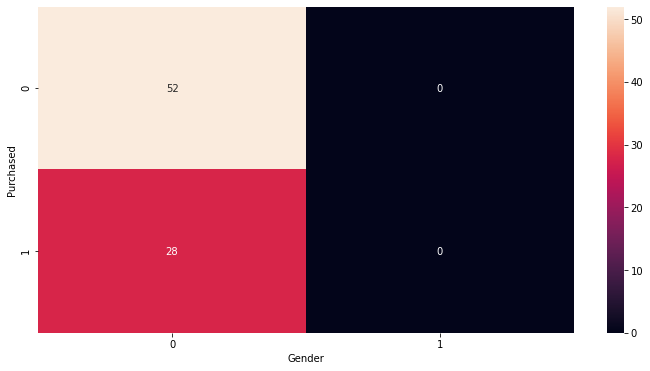

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(matrix,annot=True)
plt.xlabel('Gender')
plt.ylabel('Purchased')

In [17]:
print(' ---------------Classification Report ----------\n \n',classification_report(ytest,ypred))

 ---------------Classification Report ----------
 
               precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



C:\Users\sudri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
print('Accuracy:',accuracy_score(ytest,ypred)*100)

Accuracy: 65.0
